# build 3'UTR and 5' UTR RBP networks

- intra cell line similarity (dominant by RNA level)
- compare with STRING and known complexes

In [1]:
import pandas as pd
three_utr = pd.read_pickle('~/projects/three_utr.pickle')
five_utr = pd.read_pickle('~/projects/five_utr.pickle')

In [2]:
three_utr.head()

4,ENST00000373020.9,ENST00000371588.9,ENST00000002165.11,ENST00000650454.1,ENST00000341376.10,ENST00000374399.9,ENST00000374811.7,ENST00000002829.8,ENST00000003100.13,ENST00000394507.5,...,ENST00000568641.1,ENST00000651235.1,ENST00000652720.1,ENST00000650969.1,ENST00000651560.1,ENST00000654051.1,ENST00000512194.2,ENST00000662216.1,ENST00000474359.7,ENST00000504061.1
uID,,,,,,,,,,,,,,,,,,,,,
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# similarity between cell lines

In [3]:
eclip_bam = pd.read_csv('/home/hsher/projects/peak_calling/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

In [74]:
eclip_bam.loc[eclip_bam['RBP'].str.contains('PP')]

,uID,RBP,Cell line,CLIP_rep1,CLIP_rep2,INPUT
77,414,PPIL4,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
106,495,PPIG,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...


In [4]:
all_pairs = []
for name, g in eclip_bam.groupby(by = 'RBP'):
    pair = g['uID'].tolist()
    if len(pair) == 2:
        all_pairs.append(pair)

In [6]:
intra_similarity = []
from sklearn.metrics import jaccard_similarity_score 
for pair in all_pairs:
    if pair[0] in three_utr.index and pair[1] in three_utr.index:
        intra_similarity.append(jaccard_similarity_score(three_utr.loc[pair[1]].values, three_utr.loc[pair[0]].values))

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


(array([ 1.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  1.,  2.,  0.,  2.,  0.,
         2.,  2.,  3.,  3.,  3., 12., 34.]),
 array([0.77205447, 0.78344583, 0.79483718, 0.80622854, 0.81761989,
        0.82901125, 0.84040261, 0.85179396, 0.86318532, 0.87457667,
        0.88596803, 0.89735938, 0.90875074, 0.9201421 , 0.93153345,
        0.94292481, 0.95431616, 0.96570752, 0.97709888, 0.98849023,
        0.99988159]),
 <a list of 20 Patch objects>)

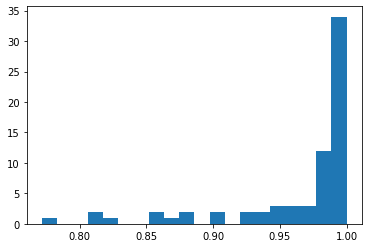

In [7]:
import matplotlib.pyplot as plt
plt.hist(intra_similarity, bins = 20)

In [8]:
intra_similarity = []
for pair in all_pairs:
    if pair[0] in five_utr.index and pair[1] in five_utr.index:
        intra_similarity.append(jaccard_similarity_score(five_utr.loc[pair[1]].values, five_utr.loc[pair[0]].values))

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  4.,  3.,  8., 48.]),
 array([0.56657029, 0.58823489, 0.60989949, 0.63156409, 0.65322869,
        0.67489329, 0.6965579 , 0.7182225 , 0.7398871 , 0.7615517 ,
        0.7832163 , 0.8048809 , 0.8265455 , 0.84821011, 0.86987471,
        0.89153931, 0.91320391, 0.93486851, 0.95653311, 0.97819771,
        0.99986232]),
 <a list of 20 Patch objects>)

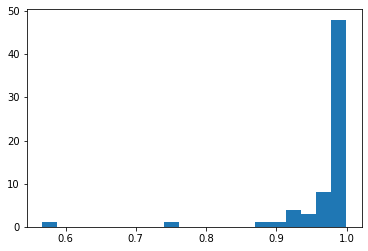

In [9]:
plt.hist(intra_similarity, bins = 20)

# Calculate overall binding
since the two cell line replicates are quite similar, we shall merge the two entry

In [10]:
def merge_cell_line_replicates(df):
    ''' merge cell line replicates using only CONSENSUS peaks'''
    merged_df = pd.DataFrame(columns = df.columns)
    for name, g in eclip_bam.groupby(by = 'RBP'):
        if len(set(g['uID']).intersection(df.index))== g.shape[0]:
            if g.shape[0] == 1: # only in 1 cell line
                merged_df = merged_df.append(df.loc[g['uID'].values], ignore_index = False)
            else:
                
                combined_peak = df.loc[g['uID'].iloc[0]].multiply(df.loc[g['uID'].iloc[1]])
                combined_peak.name = g['uID'].iloc[0]
                #print(df.loc[g['uID']].append(combined_peak))
                merged_df = merged_df.append(combined_peak, ignore_index = False)
    return merged_df

In [11]:
three_utr_merged = merge_cell_line_replicates(three_utr)

In [12]:
len(eclip_bam['RBP'].unique())

150

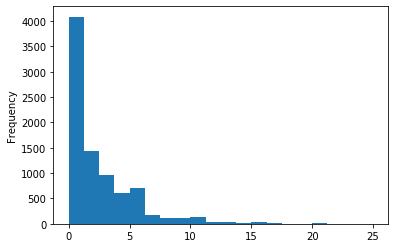

In [13]:
three_utr_merged.sum(axis = 0).plot.hist(bins = 20)# number of RBP binding per transcript

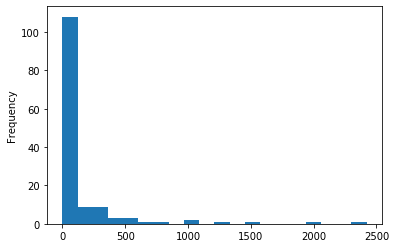

In [14]:
three_utr_merged.sum(axis = 1).plot.hist(bins = 20)# how many transcript one RBP binds to

In [15]:
five_utr_merged = merge_cell_line_replicates(five_utr)

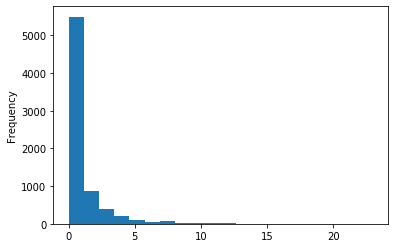

In [16]:
five_utr_merged.sum(axis = 0).plot.hist(bins = 20)# number of RBP binding per transcript

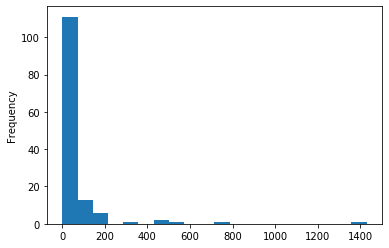

In [17]:
five_utr_merged.sum(axis = 1).plot.hist(bins = 20)# how many transcript one RBP binds to

In [18]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
def jaccard_distribution(df):
    jac_sim = 1 - pairwise_distances(df.values, metric = "jaccard") # jaccard = disagree(does not include 0)
    rbp_name = eclip_bam.loc[eclip_bam['uID'].isin(df.index), 'RBP']
    print(rbp_name)
    jac_df = pd.DataFrame(jac_sim, index = rbp_name.values, columns = rbp_name.values)
    
    # to edgelist
    jac_df = jac_df.stack().reset_index()
    # rename the columns
    jac_df.columns = ['protein_one_name', 'protein_two_name', 'jaccard_similarity']

    # create a mask to identify rows with duplicate features as mentioned above
    mask_dups = (jac_df[['protein_one_name', 'protein_two_name']].apply(frozenset, axis=1).duplicated()) | (jac_df['protein_one_name']==jac_df['protein_two_name']) 

    # apply the mask to clean the correlation dataframe
    jac_df = jac_df[~mask_dups]
    
    
    return(jac_df)

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1735: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0        HNRNPC
1        RBFOX2
2       IGF2BP1
3        HNRNPK
4         SRSF7
         ...   
214      PABPN1
215       PRPF4
216       TIAL1
221    APOBEC3C
222        SUB1
Name: RBP, Length: 140, dtype: object


(array([8.229e+03, 7.270e+02, 3.350e+02, 1.760e+02, 9.200e+01, 3.700e+01,
        2.800e+01, 1.400e+01, 1.600e+01, 1.800e+01, 5.000e+00, 0.000e+00,
        6.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.700e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

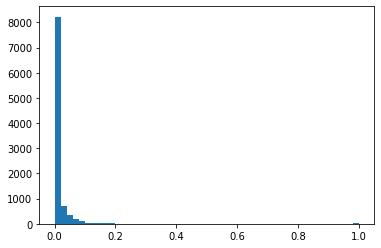

In [19]:
three_jac= jaccard_distribution(three_utr_merged)
plt.hist(three_jac['jaccard_similarity'], bins = 50)

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1735: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0        HNRNPC
1        RBFOX2
2       IGF2BP1
3        HNRNPK
4         SRSF7
         ...   
214      PABPN1
215       PRPF4
216       TIAL1
221    APOBEC3C
222        SUB1
Name: RBP, Length: 136, dtype: object


(array([8.209e+03, 5.020e+02, 1.850e+02, 9.500e+01, 5.800e+01, 3.300e+01,
        1.100e+01, 1.200e+01, 1.000e+01, 1.500e+01, 0.000e+00, 3.000e+00,
        8.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.900e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

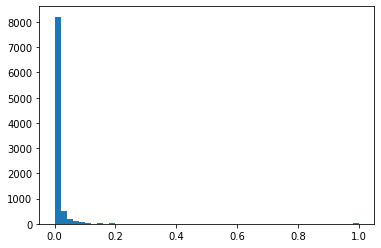

In [20]:
five_jac= jaccard_distribution(five_utr_merged)
plt.hist(five_jac['jaccard_similarity'], bins = 50)

# Correlate with string ppi

In [21]:
string = pd.read_pickle('~/projects/peak_calling/string_rbp_in.pickle')

In [22]:
string.head()

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,protein_one,protein_two
23473,9606.ENSP00000156109,9606.ENSP00000156471,binding,NaN,f,f,901,ENSP00000156109,ENSP00000156471
23474,9606.ENSP00000156109,9606.ENSP00000156471,catalysis,NaN,t,f,901,ENSP00000156109,ENSP00000156471
23475,9606.ENSP00000156109,9606.ENSP00000156471,catalysis,NaN,t,t,901,ENSP00000156109,ENSP00000156471
23476,9606.ENSP00000156109,9606.ENSP00000156471,reaction,NaN,f,f,901,ENSP00000156109,ENSP00000156471
23477,9606.ENSP00000156109,9606.ENSP00000156471,reaction,NaN,t,f,901,ENSP00000156109,ENSP00000156471


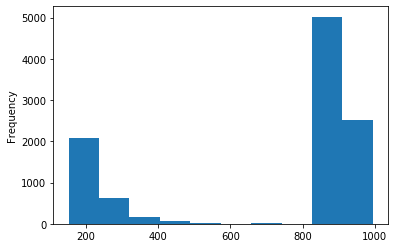

In [23]:
string['score'].plot.hist()

In [23]:
rbp_id = pd.read_pickle('~/projects/peak_calling/RBP_id.pickle')

In [24]:
all_protein = list(set(string['protein_one'].append(string['protein_two'])))
names = []
for p in all_protein:
    for id_set in rbp_id['esnp'].index:
        if p in rbp_id.loc[id_set, 'esnp']:
            names.append(id_set)

In [25]:
id_to_name = dict(zip(all_protein, names))

In [26]:
string['protein_one_name'] = string['protein_one'].map(id_to_name)
string['protein_two_name'] = string['protein_two'].map(id_to_name)
string['mapper'] = string[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)

In [27]:
string.shape

(10524, 12)

In [28]:
string.drop_duplicates('mapper', inplace = True)

In [29]:
three_jac['mapper'] = three_jac[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)
five_jac['mapper'] = five_jac[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)


In [30]:
string = string.merge(three_jac, on = 'mapper', how = 'outer', suffixes = ('', '_3UTR'))

string = string.merge(five_jac, on = 'mapper', how = 'outer', suffixes = ('', '_5UTR'))

In [31]:
string.shape

(10227, 18)

In [32]:
string.count()

item_id_a                   1057
item_id_b                   1057
mode                        1057
action                        62
is_directional              1057
a_is_acting                 1057
score                       1057
protein_one                 1057
protein_two                 1057
protein_one_name            1057
protein_two_name            1057
mapper                     10227
protein_one_name_3UTR       9730
protein_two_name_3UTR       9730
jaccard_similarity          9730
protein_one_name_5UTR       9180
protein_two_name_5UTR       9180
jaccard_similarity_5UTR     9180
dtype: int64

# interaction detected and not detected by STRING

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b39bba73710>,
      dtype=object)

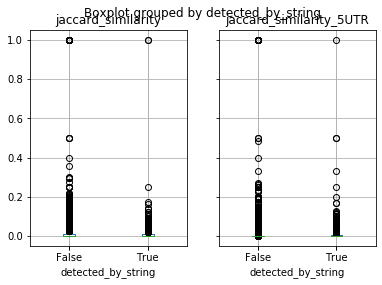

In [33]:
string['detected_by_string'] = string['score'].notnull()
string.boxplot(column = ['jaccard_similarity', 'jaccard_similarity_5UTR'],by = 'detected_by_string')

In [34]:
string.groupby(by = 'detected_by_string')['jaccard_similarity', 'jaccard_similarity_5UTR'].mean()

/home/hsher/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,jaccard_similarity,jaccard_similarity_5UTR
detected_by_string,,
False,0.014267,0.010197
True,0.011460,0.010807


## by percentile

In [35]:
string['jaccard_similarity_perc'] = np.digitize(string['jaccard_similarity'].fillna(0), np.percentile(string['jaccard_similarity'].fillna(0), np.arange(100)))
string['jaccard_similarity_5UTR_perc'] = np.digitize(string['jaccard_similarity_5UTR'].fillna(0), np.percentile(string['jaccard_similarity_5UTR'].fillna(0), np.arange(100)))
string['score_perc'] = np.digitize(string['score'].fillna(0), np.percentile(string['score'].fillna(0), np.arange(100)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b39bbd192d0>,
      dtype=object)

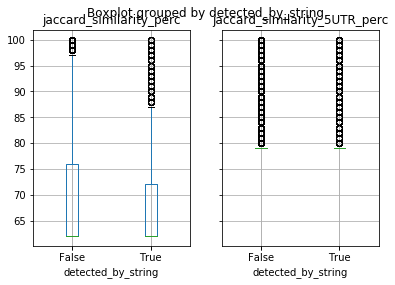

In [36]:
string.boxplot(column = ['jaccard_similarity_perc', 'jaccard_similarity_5UTR_perc'],by = 'detected_by_string')

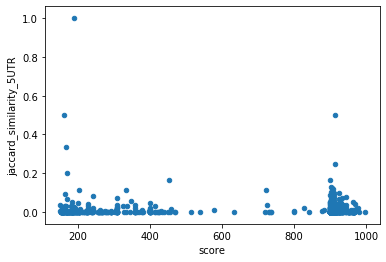

In [37]:
string.plot(kind = 'scatter', x = 'score', y = 'jaccard_similarity_5UTR')

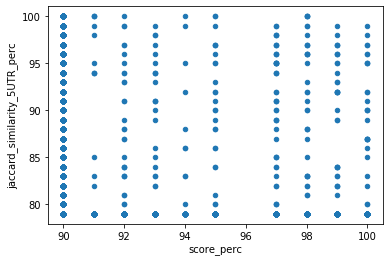

In [38]:
string.plot(kind = 'scatter', x = 'score_perc', y = 'jaccard_similarity_5UTR_perc')

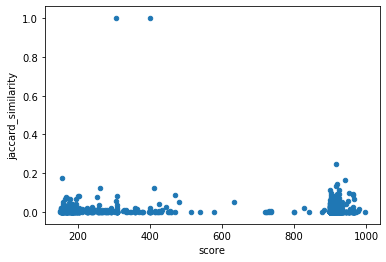

In [39]:
string.plot(kind = 'scatter', x = 'score', y = 'jaccard_similarity')

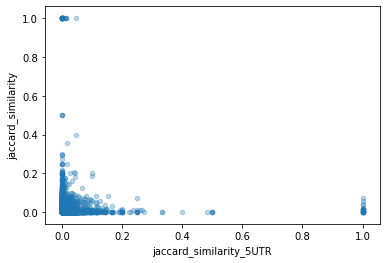

In [40]:
string.plot(kind = 'scatter', x = 'jaccard_similarity_5UTR', y = 'jaccard_similarity', alpha = 0.3)

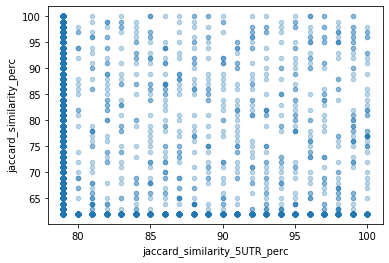

In [41]:
string.plot(kind = 'scatter', x = 'jaccard_similarity_5UTR_perc', y = 'jaccard_similarity_perc', alpha = 0.3)

In [43]:
string['protein_one'] = [list(i)[0] for i in string['mapper']]
string['protein_two'] = [list(i)[1] for i in string['mapper']]

# Do they exist in complex

In [44]:
corum_complex = pd.read_csv('~/projects/allComplexes.txt', sep = '\t')

In [45]:
all_uniprot = set()
_ = [all_uniprot.update(ids) for ids in rbp_id['uniprot.Swiss-Prot'] if type(ids) != float]

In [46]:
selected_complex_index = []
i = 0
for complex_set in corum_complex['subunits(UniProt IDs)'].str.split(';').apply(set):
    if len(complex_set.intersection(all_uniprot))>0:
        selected_complex_index.append(i)
    i+= 1


In [47]:
corum_complex = corum_complex.loc[selected_complex_index]

In [48]:
corum_complex['composition'] = corum_complex['subunits(Gene name)'].str.split(';')

## sample a random distribution

In [56]:
# normalize string
string['score'] = string['score'].fillna(0)/1000

In [59]:
# background_distribution
mean_list = []
all_protein = string['protein_one'].append(string['protein_two']).unique()
for n in range(500):
    
    random_10_protein = all_protein[np.random.random_integers(low = 0, high = len(all_protein)-1, size = 10)]
    sampled = string.loc[(string['protein_one'].isin(random_10_protein))&(string['protein_two'].isin(random_10_protein))]
    mean_list.append(sampled[['score', 'jaccard_similarity_5UTR', 'jaccard_similarity']].mean(axis = 0).values)

/home/hsher/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 147 + 1) instead
  


In [60]:
background_distribution = np.stack(mean_list)

/home/hsher/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/hsher/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0.98, 'background distibution for scores')

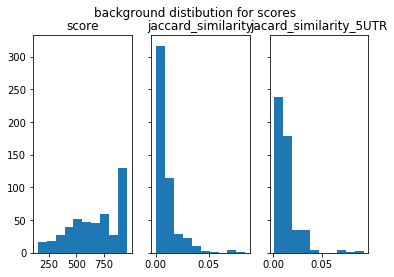

In [52]:
f, ax = plt.subplots(1,3, sharey = True)
i = 0
for score in ['score', 'jaccard_similarity', 'jacard_similarity_5UTR']:
    ax[i].hist(background_distribution[:,i])
    ax[i].set_title(score)
    i+= 1
plt.suptitle('background distibution for scores')

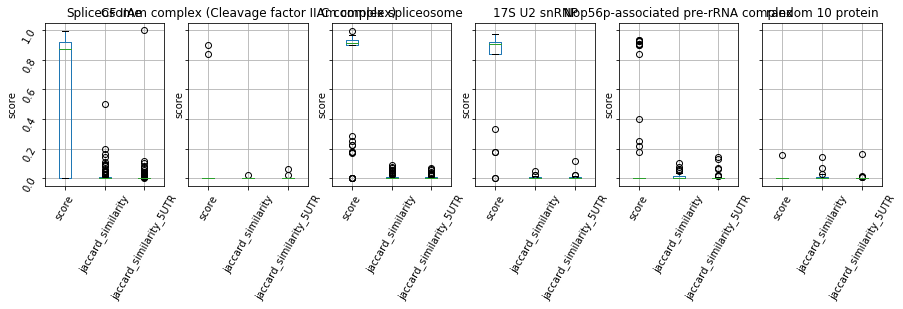

In [64]:
cols = ['score', 'jaccard_similarity', 'jaccard_similarity_5UTR']
complex_score = pd.DataFrame(index = corum_complex.index, columns = cols )
f,ax = plt.subplots(nrows = 1, ncols = corum_complex.shape[0]+1, figsize = (15,3), sharey = True)
i = 0
for c in corum_complex.index:
    
    complex_jaccard_score = string.loc[(string['protein_one'].isin(corum_complex.loc[c, 'composition']))&(string['protein_two'].isin(corum_complex.loc[c, 'composition']))]
    complex_jaccard_score = complex_jaccard_score[cols]
    complex_score.loc[c] = complex_jaccard_score.mean(axis = 0)
    complex_jaccard_score.boxplot(column = cols, ax = ax[i])
    ax[i].set_title(corum_complex.loc[c, 'ComplexName'])
    ax[i].tick_params(labelrotation=60)
    ax[i].set_ylabel('score')
    i+=1
complex_jaccard_score = string.loc[(string['protein_one'].isin(random_10_protein))&(string['protein_two'].isin(random_10_protein))]
complex_jaccard_score.boxplot(column = cols, ax = ax[i])    
ax[i].set_title('random 10 protein')
ax[i].tick_params(labelrotation=60)


In [76]:
string.loc[string['jaccard_similarity']>0.25, cols+ 'mapper']

TypeError: can only concatenate list (not "str") to list

In [66]:
# statistical significance
complex_score

,score,jaccard_similarity,jaccard_similarity_5UTR
314,0.478467,0.0121904,0.0106679
1061,0.1743,0.00194805,0.00829995
1101,0.812912,0.00887475,0.00631884
1781,0.731619,0.00683328,0.00961083
2067,0.167673,0.0129461,0.0133542


In [61]:
np.percentile(background_distribution[:,0], 95)

0.20395161290322578

In [65]:
np.percentile(background_distribution[:,1], 95)

0.03134573213417679

In [67]:
np.percentile(background_distribution[:,2], 95)

0.03401494445705279

# wilcoxin (pair with same/different complex)!!
permutation

# look for decapping in Gene Ontology/REactome/

# extend to exon/intron/ncRNA
# MS dataset

# jaccrd --> directional (see one note)